In [80]:
import os
import numpy as np

In [81]:
os.getcwd()

'/home/djamel/Documents/Master-2/Fouille_Donnees/Manips'

In [82]:
base_dir='.'

In [83]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [84]:
train_eosinophil_dir=os.path.join(train_dir,'eosinophil')
os.mkdir(train_eosinophil_dir)
train_lymphocyte_dir=os.path.join(train_dir,'lymphocyte')
os.mkdir(train_lymphocyte_dir)
# train_monocyte_dir=os.path.join(train_dir,'monocyte')
# os.mkdir(train_monocyte_dir)
# train_neutrophil_dir=os.path.join(train_dir,'neutrophil')
# os.mkdir(train_neutrophil_dir)

In [85]:
validation_eosinophil_dir=os.path.join(validation_dir,'eosinophil')
os.mkdir(validation_eosinophil_dir)
validation_lymphocyte_dir=os.path.join(validation_dir,'lymphocyte')
os.mkdir(validation_lymphocyte_dir)
# validation_monocyte_dir=os.path.join(validation_dir,'monocyte')
# os.mkdir(validation_monocyte_dir)
# validation_neutrophil_dir=os.path.join(validation_dir,'neutrophil')
# os.mkdir(validation_neutrophil_dir)

In [86]:
test_eosinophil_dir=os.path.join(test_dir,'eosinophil')
os.mkdir(test_eosinophil_dir)
test_lymphocyte_dir=os.path.join(test_dir,'lymphocyte')
os.mkdir(test_lymphocyte_dir)
# test_monocyte_dir=os.path.join(test_dir,'monocyte')
# os.mkdir(test_monocyte_dir)
# test_neutrophil_dir=os.path.join(test_dir,'neutrophil')
# os.mkdir(test_neutrophil_dir)

In [87]:
import shutil

In [88]:
i=0
source_eosinophil_dir='./TRAIN/EOSINOPHIL'
for fname in os.listdir(source_eosinophil_dir):
    if i<1700:
        src=os.path.join(source_eosinophil_dir,fname)
        dst=os.path.join(train_eosinophil_dir,fname)
        shutil.copy(src,dst)
    else:
        src=os.path.join(source_eosinophil_dir,fname)
        dst=os.path.join(validation_eosinophil_dir,fname)
        shutil.copy(src,dst)   
    i+=1

In [89]:
i=0
source_lymphocyte_dir='./TRAIN/LYMPHOCYTE'
for fname in os.listdir(source_lymphocyte_dir):
    if i<1700:
        src=os.path.join(source_lymphocyte_dir,fname)
        dst=os.path.join(train_lymphocyte_dir,fname)
        shutil.copy(src,dst)
    else:
        src=os.path.join(source_lymphocyte_dir,fname)
        dst=os.path.join(validation_lymphocyte_dir,fname)
        shutil.copy(src,dst)   
    i+=1

In [90]:
# i=0
# source_monocyte_dir='./TRAIN/MONOCYTE'
# for fname in os.listdir(source_monocyte_dir):
#     if i<1700:
#         src=os.path.join(source_monocyte_dir,fname)
#         dst=os.path.join(train_monocyte_dir,fname)
#         shutil.copy(src,dst)
#     else:
#         src=os.path.join(source_monocyte_dir,fname)
#         dst=os.path.join(validation_monocyte_dir,fname)
#         shutil.copy(src,dst)   
#     i+=1

In [91]:
# i=0
# source_neutrophil_dir='./TRAIN/NEUTROPHIL'
# for fname in os.listdir(source_neutrophil_dir):
#     if i<1700:
#         src=os.path.join(source_neutrophil_dir,fname)
#         dst=os.path.join(train_neutrophil_dir,fname)
#         shutil.copy(src,dst)
#     else:
#         src=os.path.join(source_neutrophil_dir,fname)
#         dst=os.path.join(validation_neutrophil_dir,fname)
#         shutil.copy(src,dst)   
#     i+=1

In [92]:
from keras import layers
from keras import models

In [93]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(120, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 118, 158, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 57, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 38, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 18, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 16, 128)       147584    
__________

In [95]:
from keras import optimizers

In [96]:
# model.compile(loss='binary_crossentropy',
#     optimizer=optimizers.RMSprop(lr=1e-4),
#     metrics=['acc'])

In [97]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),  #adam
    metrics=['acc'])

In [98]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [99]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(120, 160),
    batch_size=20,  
    class_mode='binary')
    #classes=['eosinophil','lymphocyte','monocyte','neutrophil'])

Found 3400 images belonging to 2 classes.


In [100]:
train_generator.class_indices

{'eosinophil': 0, 'lymphocyte': 1}

In [101]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(120, 160),
    batch_size=20,
    class_mode='binary')
    #classes=['eosinophil','lymphocyte','monocyte','neutrophil'])

Found 1580 images belonging to 2 classes.


In [102]:
validation_generator.class_indices

{'eosinophil': 0, 'lymphocyte': 1}

In [103]:
history = model.fit_generator(
    train_generator,
    #steps_per_epoch=50, 
    epochs=20,
    validation_data=validation_generator)
    #validation_steps=30)

Epoch 1/20
170/170 [==============================] - 72s 426ms/step - loss: 0.6926 - acc: 0.5174 - val_loss: 0.6708 - val_acc: 0.6386
Epoch 2/20
170/170 [==============================] - 72s 424ms/step - loss: 0.6294 - acc: 0.6556 - val_loss: 0.5397 - val_acc: 0.7582
Epoch 3/20
170/170 [==============================] - 72s 424ms/step - loss: 0.4926 - acc: 0.7515 - val_loss: 0.4117 - val_acc: 0.8152
Epoch 4/20
170/170 [==============================] - 77s 453ms/step - loss: 0.3994 - acc: 0.8182 - val_loss: 0.3971 - val_acc: 0.8399
Epoch 5/20
170/170 [==============================] - 73s 427ms/step - loss: 0.3481 - acc: 0.8429 - val_loss: 0.3845 - val_acc: 0.7994
Epoch 6/20
170/170 [==============================] - 73s 427ms/step - loss: 0.3019 - acc: 0.8691 - val_loss: 0.2686 - val_acc: 0.8873
Epoch 7/20
170/170 [==============================] - 73s 427ms/step - loss: 0.2676 - acc: 0.8826 - val_loss: 0.7660 - val_acc: 0.7196
Epoch 8/20
170/170 [==============================] - 7

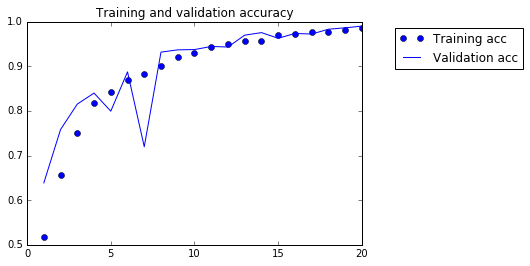

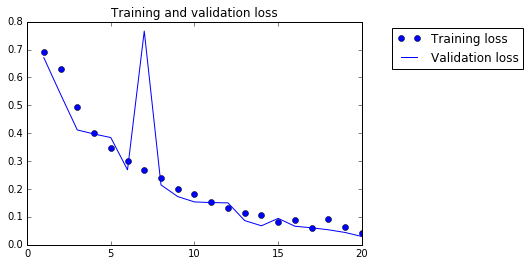

In [104]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
#plt.legend()
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.show()

## avec modele pré-entrainé ##

In [105]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(120, 160, 3)) 

In [106]:
conv_base.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 40, 128)       0         
__________

In [107]:
print(train_dir)
print(validation_dir)

./train
./validation


In [108]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 1
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 5, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(120, 160),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [109]:
train_features, train_labels = extract_features(train_dir, 3400)

Found 3400 images belonging to 2 classes.


In [110]:
validation_features, validation_labels = extract_features(validation_dir, 1500)

Found 1580 images belonging to 2 classes.


In [111]:
train_features = np.reshape(train_features, (3400, 3 * 5 * 512))
validation_features = np.reshape(validation_features, (1500, 3 * 5 * 512))

In [112]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3 * 5 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [113]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

In [114]:
history = model.fit(train_features, train_labels,
    epochs=20,
    batch_size=20,
    #steps_per_epoch=170,                
    validation_data=(validation_features, validation_labels))
    #validation_steps=30)

Train on 3400 samples, validate on 1500 samples
Epoch 1/20
3400/3400 [==============================] - 3s 981us/step - loss: 0.7189 - acc: 0.5450 - val_loss: 0.6652 - val_acc: 0.5707
Epoch 2/20
3400/3400 [==============================] - 3s 911us/step - loss: 0.6500 - acc: 0.6032 - val_loss: 0.6150 - val_acc: 0.7087
Epoch 3/20
3400/3400 [==============================] - 3s 916us/step - loss: 0.6062 - acc: 0.6876 - val_loss: 0.5880 - val_acc: 0.7553
Epoch 4/20
3400/3400 [==============================] - 3s 890us/step - loss: 0.5789 - acc: 0.7053 - val_loss: 0.5582 - val_acc: 0.7693
Epoch 5/20
3400/3400 [==============================] - 3s 888us/step - loss: 0.5424 - acc: 0.7488 - val_loss: 0.5339 - val_acc: 0.7853
Epoch 6/20
3400/3400 [==============================] - 3s 897us/step - loss: 0.5147 - acc: 0.7741 - val_loss: 0.5213 - val_acc: 0.7773
Epoch 7/20
3400/3400 [==============================] - 3s 935us/step - loss: 0.4978 - acc: 0.7903 - val_loss: 0.4867 - val_acc: 0.8240


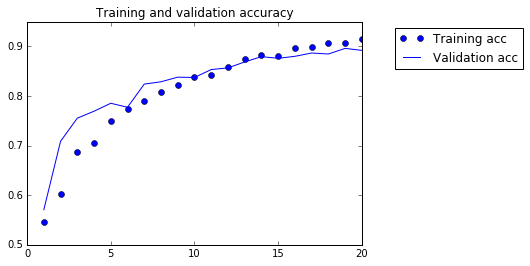

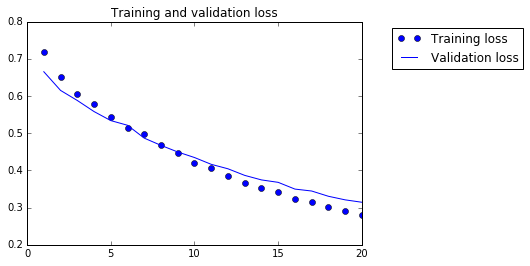

In [116]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.show()